# pycen
Lightweight Python package for exploring and acquiring U.S. Census data with intuitive spatial integration.

In [1]:
import pycen
from pycen import explore, acquire

## 2. Acquire (a geodataframe of census boundaries + variable data)
- `acquire.get_census()` -- census data only (tabular)
    - see `3_acquire_tabular.ipynb` for details
- `acquire.get_boundaries()` -- boundary files (spatial)
    - see `4_acquire_spatial-advanced.ipynb` for details
- `acquire.get_censhp()` -- **both at once** (GeoDataframe) 
    - <mark>this notebook</mark>
---
- `acquire.quick_check()` - fast data quality checks
- `acquire.quick_viz()` - rapid visualizations
- use other packages as needed for data manipulation and analysis

## variable selection
see `1_explore.ipynb` for details

In [2]:
import pycen
pycen.set_theme('default') # general helpful variables

In [3]:
pycen.get_product() # check data availability

product  label          years                 desc                               
-------  -------------  --------------------  -----------------------------------
acs1     ACS 1-year     2005-2019, 2021-2023  annual; large geos only            
acs5     ACS 5-year     2009-2023             most commonly used                 
dec_pl   Decennial PL   2010, 2020            block-level counts                 
dec_sf1  Decennial SF1  2000, 2010            population + housing (discontinued)


In [ ]:
from pycen import explore
explore.search('gini', dataset='acs5',year=2021).show()

In [5]:
# use 'lookup' to check a specific variable
explore.lookup('B19058_001E', dataset='acs5',year=2021)


Variable: B19058_001E
Label: Estimate!!Total:
Concept: PUBLIC ASSISTANCE INCOME OR FOOD STAMPS/SNAP IN THE PAST 12 MONTHS FOR HOUSEHOLDS
Type: int
Group: B19058
Year: 2021
Dataset: ACS5


## `acquire.get_censhp()`
get select variables under specified geographic resolution and boundary
- featuring select cases of geo combos, ordered large to small
- large bounding geography with small-area resolution (e.g., national map with block group-level data) is computationally heavy, especially during first request without cache

In [6]:
pycen.get_geography()

product  lowest              available (select)
-------  ------------------  ------------------
acs1     county subdivision  place, county subdivision, county, PUMA
                             congressional district, urban area, state, CBSA, CSA
                             division, region, us
acs5     block group         block group, tract, place, county subdivision, county
                             ZCTA, PUMA, congressional district, urban area, state
                             CBSA, CSA, division, region, us
dec_pl   block               block, block group, tract, place, ZCTA, county, state
dec_sf1  block               block, block group, tract, place, ZCTA, county, state
Note: full lists are available at https://api.census.gov/data/<year>/<dataset>/geography.html


### 2.1 national

#### 2.1.1 state-level median household income

In [7]:
explore.lookup('B19013_001E',year=2023,dataset='acs5')


Variable: B19013_001E
Label: Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)
Concept: Median Household Income in the Past 12 Months (in 2023 Inflation-Adjusted Dollars)
Type: int
Group: B19013
Year: 2023
Dataset: ACS5


In [8]:
gdf_mhi = acquire.get_censhp(
    variables=['B19013_001E'],
    geography='state',          # if no state/county, gets nationwide
    dataset="acs5",
    year=2023,
)
gdf_mhi.head()

Resolving geography...

Fetching data...
  Product: acs5 (2023)
  Geography: State
  Variables: 1


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Fetching boundaries...
Merging data...

Done!


,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,B19013_001E,state
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198587197,726463919,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",62125.0,35
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341525171,3387709166,"POLYGON ((-104.05788 44.99761, -104.05078 44.9...",72421.0,46
2,06,01779778,0400000US06,06,CA,California,00,403673296401,20291770234,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",96334.0,06
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",62417.0,21
4,01,01779775,0400000US01,01,AL,Alabama,00,131185049346,4582326383,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",62027.0,01


In [9]:
# quick data quality check
acquire.quick_check(gdf_mhi)  # returns top 10 columns with N/A value summary

rows, cols: (49, 12)
unique GEOID: 49
n/a values (%):
STATEFP     0.0
STATENS     0.0
GEOIDFQ     0.0
GEOID       0.0
STUSPS      0.0
NAME        0.0
LSAD        0.0
ALAND       0.0
AWATER      0.0
geometry    0.0
dtype: float64


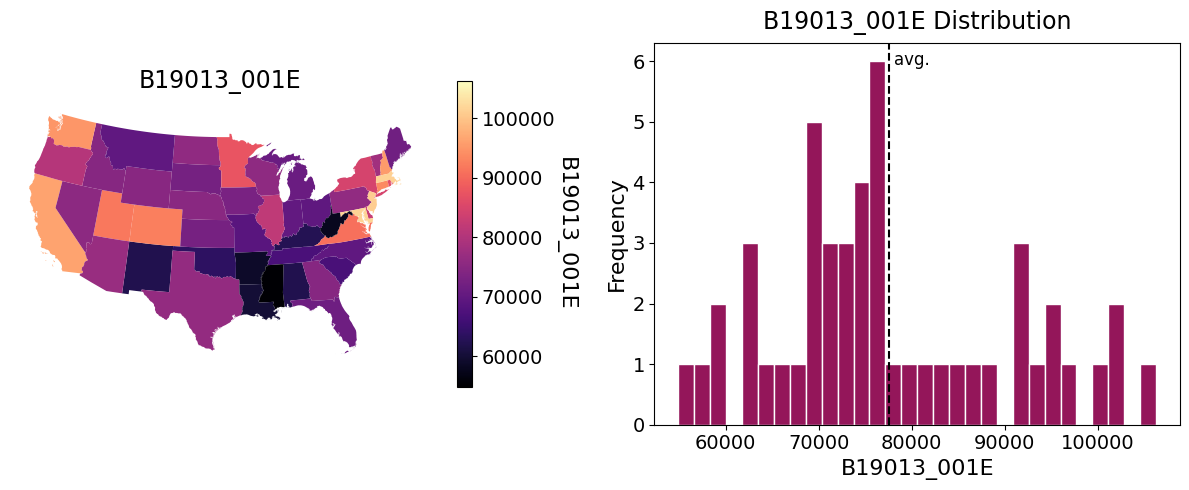

In [10]:
acquire.quick_viz(gdf_mhi, 'B19013_001E') # returns map + distribution histogram

#### 2.1.2 combined statistical area (csa)-level work from home percent

In [11]:
gdf_wfh = acquire.get_censhp(
    variables=['B08101_049E', 'B08101_001E'], # total worked from home, total commute
    geography='csa',          # if no state/county, gets nationwide
    dataset="acs5",
    year=2023,
)
gdf_wfh.head()

Resolving geography...

Fetching data...
  Product: acs5 (2023)
  Geography: Csa
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Fetching boundaries...
Merging data...

Done!


,CSAFP,GEOIDFQ,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,B08101_049E,B08101_001E,combined statistical area
0,450,330M700US450,450,"Raleigh-Durham-Cary, NC","Raleigh-Durham-Cary, NC CSA",M0,12897796143,281310818,"POLYGON ((-79.55503 35.54038, -79.55482 35.547...",243136.0,1147882.0,450
1,174,330M700US174,174,"Chattanooga-Cleveland-Dalton, TN-GA-AL","Chattanooga-Cleveland-Dalton, TN-GA-AL CSA",M0,14254498158,348848501,"MULTIPOLYGON (((-86.15423 34.53378, -86.14989 ...",42910.0,448882.0,174
2,384,330M700US384,384,"Monroe-Ruston, LA","Monroe-Ruston, LA CSA",M0,8571466626,182500009,"POLYGON ((-92.88072 32.58791, -92.88086 32.593...",7886.0,111703.0,384
3,132,330M700US132,132,"Baton Rouge-Hammond, LA","Baton Rouge-Hammond, LA CSA",M0,13369187759,660062397,"POLYGON ((-91.82264 30.85936, -91.82167 30.861...",30453.0,451470.0,132
4,361,330M700US361,361,"Marinette-Iron Mountain, WI-MI","Marinette-Iron Mountain, WI-MI CSA",M0,9563481016,1216286052,"MULTIPOLYGON (((-87.50507 45.05980, -87.50443 ...",3131.0,42853.0,361


In [12]:
# quick data quality check
acquire.quick_check(gdf_wfh)  # returns top 10 columns with N/A value summary

rows, cols: (181, 12)
unique GEOID: 181
n/a values (%):
CSAFP          0.0
GEOIDFQ        0.0
GEOID          0.0
NAME           0.0
NAMELSAD       0.0
LSAD           0.0
ALAND          0.0
AWATER         0.0
geometry       0.0
B08101_049E    0.0
dtype: float64


In [13]:
# calculate % wfh by commuters
gdf_wfh['pct_wfh'] = gdf_wfh['B08101_049E'] / gdf_wfh['B08101_001E']

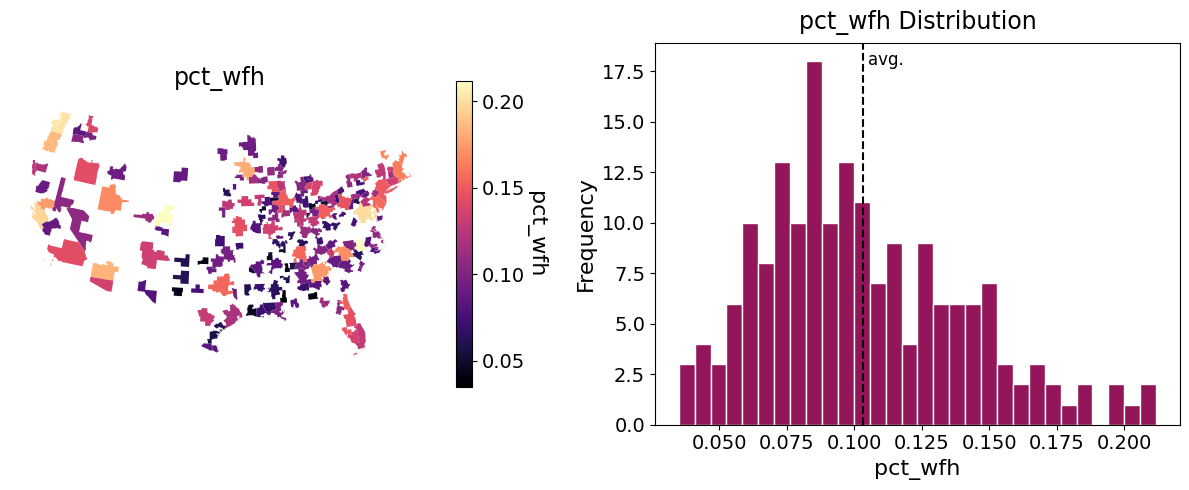

In [14]:
acquire.quick_viz(gdf_wfh, 'pct_wfh') # returns map + distribution histogram

#### 2.1.3 county-level manufacturing employment rate

In [15]:
explore.lookup('C24030_001E',year=2023,dataset='acs5')


Variable: C24030_001E
Label: Estimate!!Total:
Concept: Sex by Industry for the Civilian Employed Population 16 Years and Over
Type: int
Group: C24030
Year: 2023
Dataset: ACS5


In [16]:
# define variable set with intuitive column names
select_vars = {
    'C24030_007E': 'total_mnf_male',
    'C24030_042E': 'total_mnf_female',
    'C24030_001E': 'total_employed'
}

In [ ]:
gdf_mnf = acquire.get_censhp(
    variables=select_vars,
    geography='county',          # if no state/county, gets nationwide
    dataset="acs5",
    year=2023,
)
gdf_mnf.head()

In [18]:
# quick data quality check
acquire.quick_check(gdf_mnf)  # returns top 10 columns with N/A value summary

rows, cols: (3109, 18)
unique GEOID: 3109
n/a values (%):
STATEFP             0.0
COUNTYFP            0.0
state               0.0
total_employed      0.0
total_mnf_female    0.0
total_mnf_male      0.0
geometry            0.0
AWATER              0.0
ALAND               0.0
LSAD                0.0
dtype: float64


In [19]:
# calculate % employment in manufacture
gdf_mnf['total_mnf'] = gdf_mnf['total_mnf_male'] + gdf_mnf['total_mnf_female']
gdf_mnf['pct_mnf'] = gdf_mnf['total_mnf'] / gdf_mnf['total_employed']

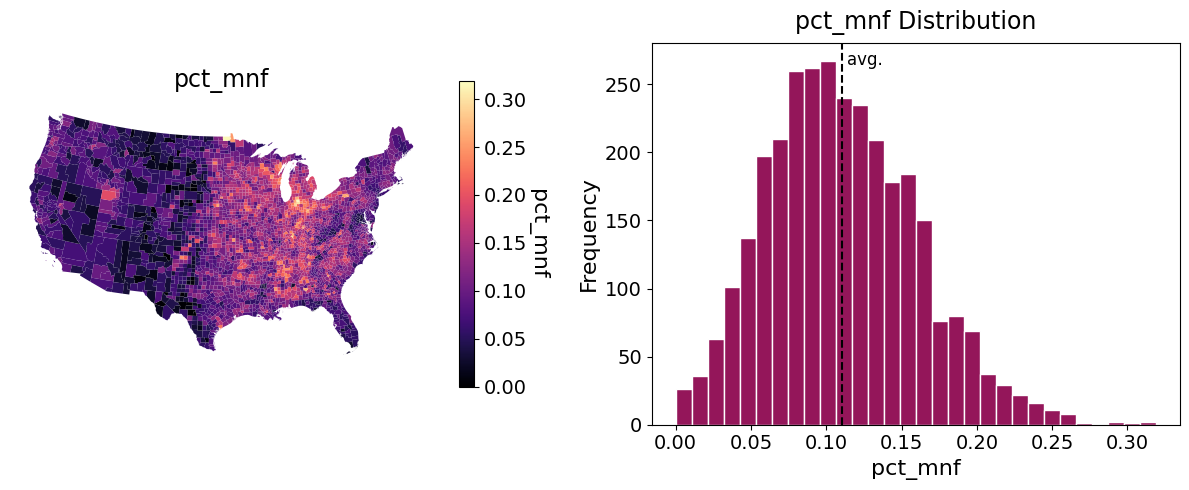

In [20]:
acquire.quick_viz(gdf_mnf, 'pct_mnf') # returns map + distribution histogram

In [ ]:
explore.search('work from home', dataset='acs5', year=2023).show()

#### 2.1.4 place-level gini index

In [22]:
# use 'lookup' to check a specific variable
explore.lookup('B19083_001E', dataset='acs5',year=2021)


Variable: B19083_001E
Label: Estimate!!Gini Index
Concept: GINI INDEX OF INCOME INEQUALITY
Type: float
Group: B19083
Year: 2021
Dataset: ACS5


In [ ]:
gdf_gini = acquire.get_censhp(
    variables={'B19083_001E':'gini_index'},
    geography='place',          # if no state/county, gets nationwide
    dataset="acs5",
    year=2023,
)

In [24]:
gdf_gini.head()

,STATEFP,PLACEFP,PLACENS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,gini_index,state,place
0,01,20104,02404206,1600000US0120104,0120104,Decatur,Decatur city,AL,Alabama,25,141397708,16642891,"MULTIPOLYGON (((-87.05348 34.61970, -87.04766 ...",0.4496,01,20104
1,01,21184,02404238,1600000US0121184,0121184,Dothan,Dothan city,AL,Alabama,25,232683116,844856,"POLYGON ((-85.51955 31.27851, -85.51520 31.278...",0.4952,01,21184
2,01,29032,02406541,1600000US0129032,0129032,Garden City,Garden City town,AL,Alabama,43,5849008,67663,"POLYGON ((-86.75773 34.02998, -86.75326 34.029...",0.3008,01,29032
3,01,31720,02403743,1600000US0131720,0131720,Greensboro,Greensboro city,AL,Alabama,25,6156793,24951,"POLYGON ((-87.61187 32.70031, -87.60936 32.700...",0.3927,01,31720
4,01,45640,02406137,1600000US0145640,0145640,McMullen,McMullen town,AL,Alabama,43,283764,0,"POLYGON ((-88.17948 33.15006, -88.17396 33.150...",0.1960,01,45640


In [25]:
# quick data quality check
acquire.quick_check(gdf_gini)  # returns top 10 columns with N/A value summary

rows, cols: (31515, 16)
unique GEOID: 31515
n/a values (%):
gini_index    3.37
STATEFP       0.00
PLACEFP       0.00
PLACENS       0.00
GEOIDFQ       0.00
GEOID         0.00
NAME          0.00
NAMELSAD      0.00
STUSPS        0.00
STATE_NAME    0.00
dtype: float64


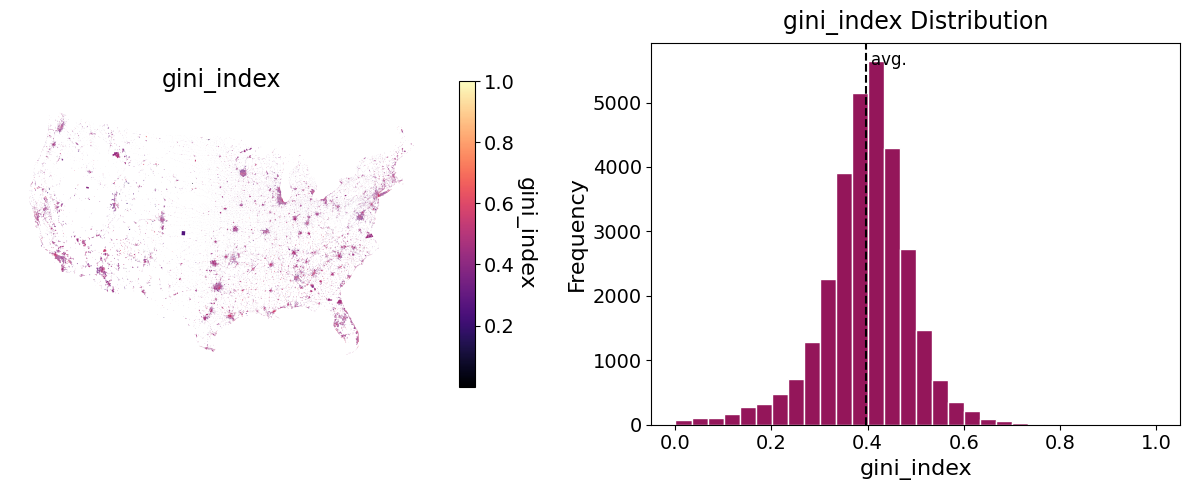

In [26]:
acquire.quick_viz(gdf_gini, 'gini_index') # returns map + distribution histogram

### 2.2 CSA/CBSA (combined/core-based statistical area)

In [27]:
pycen.geography.list_csa(query='detroit',year=2023, limit=5) # look up csa name

,NAME,GEOID,CSAFP
86,"Detroit-Warren-Ann Arbor, MI",220,220


In [28]:
pycen.geography.list_cbsa(query='new york',year=2023, limit=5) # look up cbsa name

,NAME,GEOID,CBSAFP
455,"New York-Newark-Jersey City, NY-NJ",35620,35620


#### 2.2.1 tract-level foreign-born %

In [ ]:
explore.search('foreign born',year=2023,dataset='acs5').show()

In [30]:
explore.lookup('B01003_001E',year=2023,dataset='acs5')


Variable: B01003_001E
Label: Estimate!!Total
Concept: Total Population
Type: int
Group: B01003
Year: 2023
Dataset: ACS5


In [ ]:
gdf_fb = acquire.get_censhp(
    variables=['B05002_013E', 'B01003_001E'],  # total foreign born, total pop
    geography='tract',          
    cbsa='New York-Newark-Jersey City',
    state=['NY','NJ'],               # cbsa clipping requires state, NY CBSA crosses multiple states
    dataset='acs5',
    year=2023,
)
gdf_fb.head()

In [32]:
# quick data quality check
acquire.quick_check(gdf_fb)  # returns top 10 columns with N/A value summary

rows, cols: (4903, 19)
unique GEOID: 4903
n/a values (%):
STATEFP        0.0
LSAD           0.0
county         0.0
state          0.0
B01003_001E    0.0
B05002_013E    0.0
geometry       0.0
AWATER         0.0
ALAND          0.0
STATE_NAME     0.0
dtype: float64


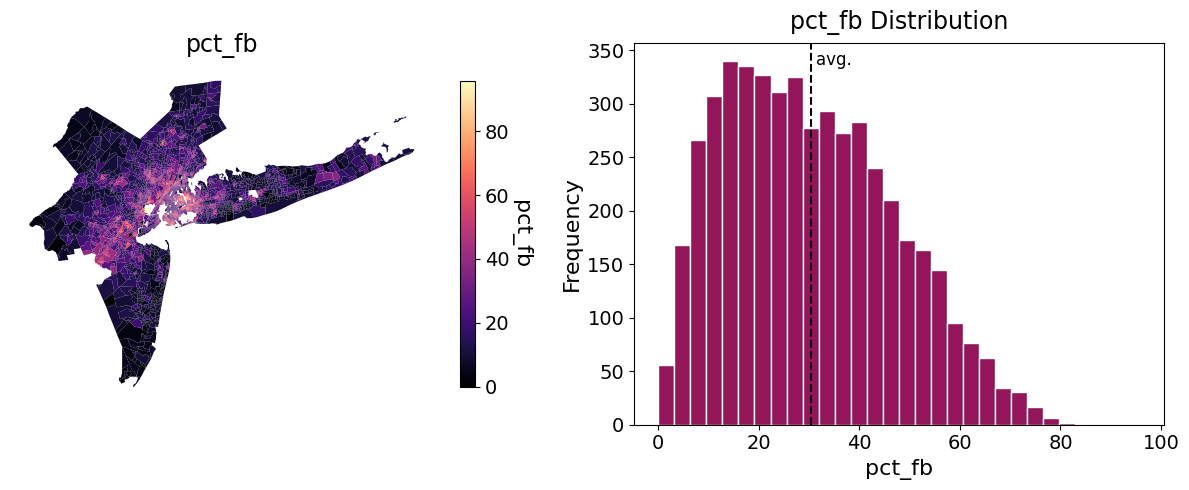

In [33]:
gdf_fb['pct_fb'] = gdf_fb['B05002_013E'] / gdf_fb['B01003_001E'] * 100
acquire.quick_viz(gdf_fb, 'pct_fb') # returns map + distribution histogram

#### 2.2.2 block group-level vacancy rate

In [34]:
explore.lookup('B25002_001E',year=2023,dataset='acs5')


Variable: B25002_001E
Label: Estimate!!Total:
Concept: Occupancy Status
Type: int
Group: B25002
Year: 2023
Dataset: ACS5


In [35]:
gdf_vac = acquire.get_censhp(
    variables=['B25002_003E', 'B25002_001E'],  # total vacant, total occupancy
    geography='block group',          
    csa='Detroit-Warren-Ann Arbor',
    state='MI',                # csa clipping requires state
    dataset='acs5',
    year=2023,
)
gdf_vac.head()

Resolving geography...
  State: Michigan (MI, FIPS: 26)

Fetching data...
  Product: acs5 (2023)
  Geography: Block Group
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


Fetching boundaries...
Merging data...
Clipping to csa: Detroit-Warren-Ann Arbor
Fetching boundaries...

Done!


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOIDFQ,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,B25002_003E,B25002_001E,state,county,tract,block group
0,26,099,247302,2,1500000US260992473022,260992473022,2,Block Group 2,BG,988867,3938109,"POLYGON ((-82.80463 42.60837, -82.79401 42.605...",7.0,412.0,26,099,247302,2
2,26,049,011710,2,1500000US260490117102,260490117102,2,Block Group 2,BG,1256468,0,"POLYGON ((-83.51804 43.04190, -83.50320 43.042...",23.0,542.0,26,049,011710,2
3,26,163,581900,4,1500000US261635819004,261635819004,4,Block Group 4,BG,541105,0,"POLYGON ((-83.19397 42.21367, -83.18808 42.213...",0.0,631.0,26,163,581900,4
8,26,099,251800,2,1500000US260992518002,260992518002,2,Block Group 2,BG,281515,0,"POLYGON ((-82.92034 42.46080, -82.91112 42.458...",0.0,232.0,26,099,251800,2
9,26,099,227300,3,1500000US260992273003,260992273003,3,Block Group 3,BG,1203284,0,"POLYGON ((-82.99353 42.64122, -82.97386 42.641...",0.0,694.0,26,099,227300,3


In [36]:
# quick data quality check
acquire.quick_check(gdf_vac)  # returns top 10 columns with N/A value summary

rows, cols: (4512, 18)
unique GEOID: 4512
n/a values (%):
STATEFP        0.0
COUNTYFP       0.0
tract          0.0
county         0.0
state          0.0
B25002_001E    0.0
B25002_003E    0.0
geometry       0.0
AWATER         0.0
ALAND          0.0
dtype: float64


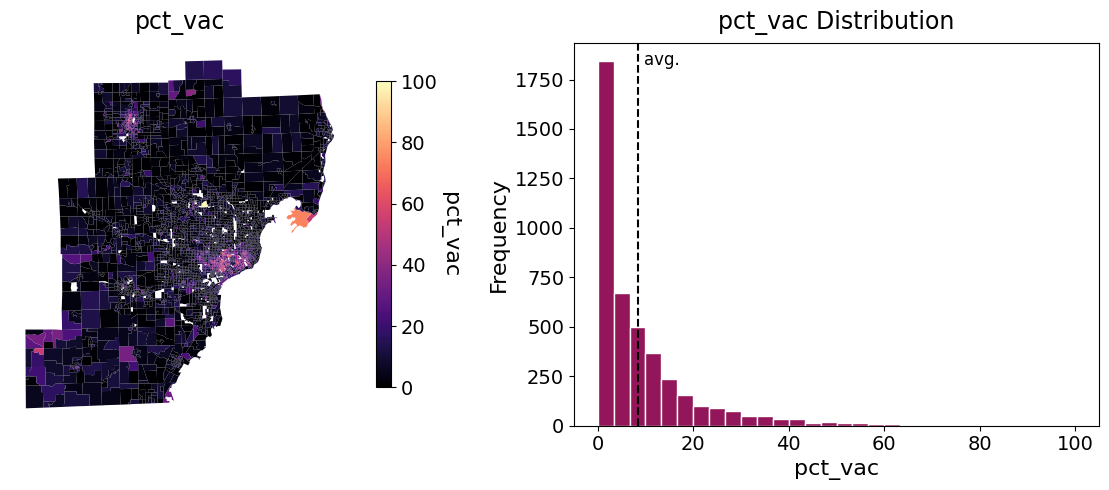

In [37]:
gdf_vac['pct_vac'] = gdf_vac['B25002_003E'] / gdf_vac['B25002_001E'] * 100
acquire.quick_viz(gdf_vac, 'pct_vac') # returns map + distribution histogram

### 2.3 state

#### 2.3.1 county-level median age

In [38]:
gdf_ma = acquire.get_censhp(
    variables=['B01002_001E'],  # median age
    geography='county',
    state='FL',                
    dataset='acs5',
    year=2023,
)
gdf_ma.head()

Resolving geography...
  State: Florida (FL, FIPS: 12)

Fetching data...
  Product: acs5 (2023)
  Geography: County
  Variables: 1


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Fetching boundaries...
Merging data...

Done!


,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,B01002_001E,state,county
0,12,123,00295728,0500000US12123,12123,Taylor,Taylor County,FL,Florida,06,2702230205,1213570858,"MULTIPOLYGON (((-83.83005 29.97302, -83.82784 ...",43.8,12,123
1,12,017,00295752,0500000US12017,12017,Citrus,Citrus County,FL,Florida,06,1507146172,981162732,"MULTIPOLYGON (((-82.75733 28.80073, -82.75115 ...",56.9,12,017
2,12,071,00295758,0500000US12071,12071,Lee,Lee County,FL,Florida,06,2022848994,1900537643,"MULTIPOLYGON (((-82.18358 26.69502, -82.18120 ...",49.3,12,071
3,12,101,00295739,0500000US12101,12101,Pasco,Pasco County,FL,Florida,06,1933694371,694082239,"MULTIPOLYGON (((-82.79914 28.18528, -82.79776 ...",43.7,12,101
4,12,033,00295737,0500000US12033,12033,Escambia,Escambia County,FL,Florida,06,1701606700,1213969803,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",38.1,12,033


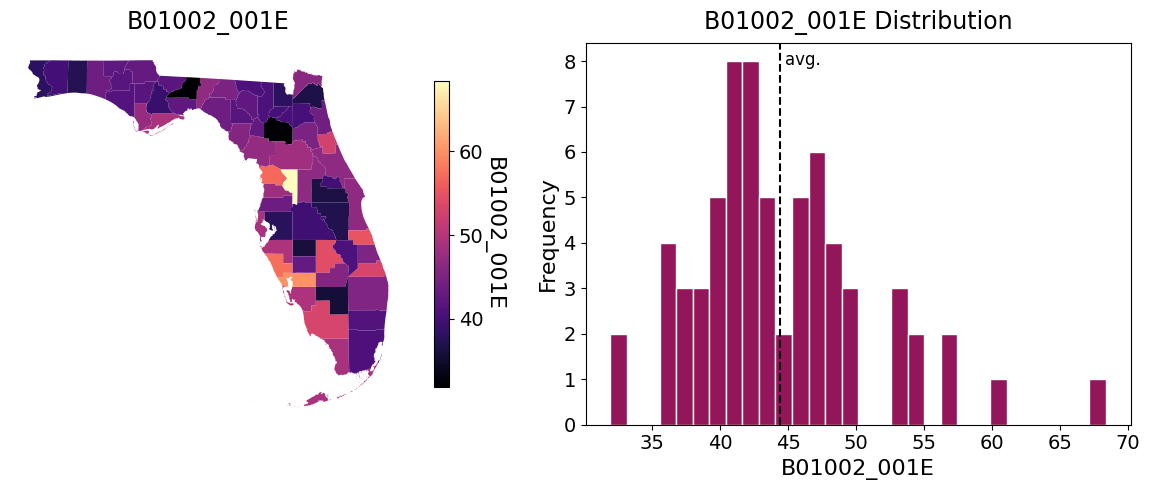

In [39]:
acquire.quick_viz(gdf_ma,'B01002_001E')

#### 2.3.2 tract-level seasonal/vacational housing stock

In [40]:
explore.lookup('B25004_006E',year=2023,dataset='acs5')


Variable: B25004_006E
Label: Estimate!!Total:!!For seasonal, recreational, or occasional use
Concept: Vacancy Status
Type: int
Group: B25004
Year: 2023
Dataset: ACS5


In [41]:
gdf_rec = acquire.get_censhp(
    variables=['B25004_006E', 'B25002_001E'],  # total seasonal/recreational use, total occupancy
    geography='tract',          
    state='WA',                
    dataset='acs5',
    year=2023,
)
gdf_rec.head()

Resolving geography...
  State: Washington (WA, FIPS: 53)

Fetching data...
  Product: acs5 (2023)
  Geography: Tract
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Fetching boundaries...
Merging data...

Done!


,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,B25004_006E,B25002_001E,state,county,tract
0,53,011,042500,1400000US53011042500,53011042500,425,Census Tract 425,WA,Clark County,Washington,CT,931480,0,"POLYGON ((-122.67164 45.62722, -122.67157 45.6...",0.0,996.0,53,011,042500
1,53,011,041206,1400000US53011041206,53011041206,412.06,Census Tract 412.06,WA,Clark County,Washington,CT,3146558,0,"POLYGON ((-122.58041 45.63943, -122.57289 45.6...",0.0,2465.0,53,011,041206
2,53,011,041800,1400000US53011041800,53011041800,418,Census Tract 418,WA,Clark County,Washington,CT,1469623,0,"POLYGON ((-122.66170 45.64505, -122.66161 45.6...",0.0,1915.0,53,011,041800
3,53,011,040904,1400000US53011040904,53011040904,409.04,Census Tract 409.04,WA,Clark County,Washington,CT,4239415,0,"POLYGON ((-122.68768 45.71340, -122.68572 45.7...",0.0,2505.0,53,011,040904
4,53,003,960500,1400000US53003960500,53003960500,9605,Census Tract 9605,WA,Asotin County,Washington,CT,1875145,0,"POLYGON ((-117.05936 46.40209, -117.05865 46.4...",0.0,1512.0,53,003,960500


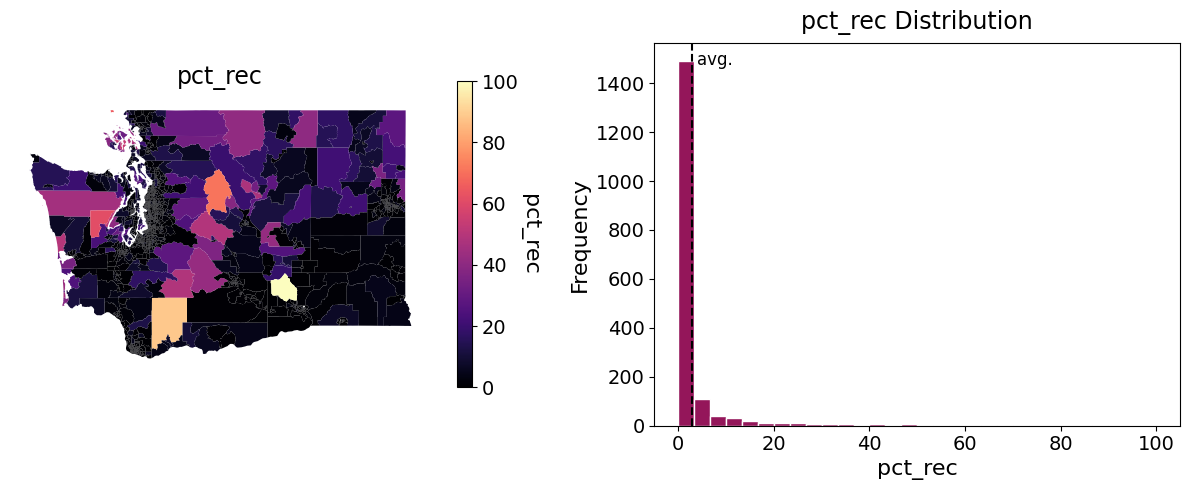

In [42]:
gdf_rec['pct_rec'] = gdf_rec['B25004_006E'] / gdf_rec['B25002_001E'] * 100
acquire.quick_viz(gdf_rec,'pct_rec')

### 2.4 county

#### 2.4.1 tract-level poverty rate

In [43]:
explore.lookup('B17001_001E',year=2023,dataset='acs5')


Variable: B17001_001E
Label: Estimate!!Total:
Concept: Poverty Status in the Past 12 Months by Sex by Age
Type: int
Group: B17001
Year: 2023
Dataset: ACS5


Resolving geography...
  State: Illinois (IL, FIPS: 17)
  County: Cook County (FIPS: 031)

Fetching data...
  Product: acs5 (2023)
  Geography: Tract
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Fetching boundaries...
Merging data...

Done!


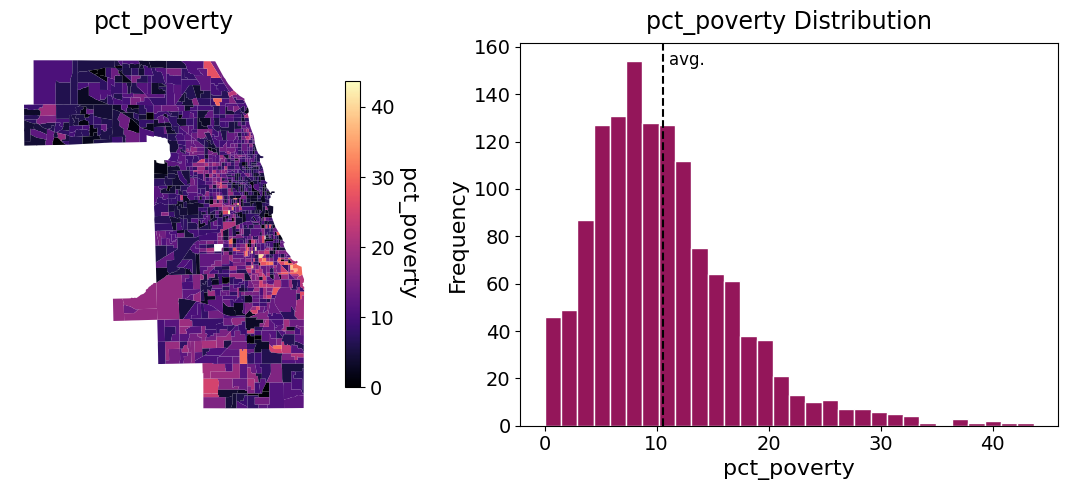

In [44]:
gdf_pvt = acquire.get_censhp(
    variables={"B08303_012E":"total_below_pov", "B08303_001E":"total_pov_stat"},
    geography="tract",
    county="Cook County",
    state="IL",
    dataset="acs5",
    year=2023
)
gdf_pvt["pct_poverty"] = gdf_pvt["total_below_pov"] / gdf_pvt["total_pov_stat"] * 100
acquire.quick_viz(gdf_pvt, "pct_poverty")

#### 2.4.2 block group-level super commuter %

In [45]:
from pycen.geography.search import search
search('chicago')

{'state': None,
 'places': [{'fips': '14000', 'name': 'Chicago city', 'state_fips': '17'}],
 'counties': [{'fips': '031', 'name': 'Cook', 'state_fips': '17'},
  {'fips': '043', 'name': 'Dupage', 'state_fips': '17'}]}

In [46]:
explore.lookup('B08303_012E',year=2023,dataset='acs5')


Variable: B08303_012E
Label: Estimate!!Total:!!60 to 89 minutes
Concept: Travel Time to Work
Type: int
Group: B08303
Year: 2023
Dataset: ACS5


Resolving geography...
  State: Illinois (IL, FIPS: 17)
  County: Cook County (FIPS: 031)

Fetching data...
  Product: acs5 (2023)
  Geography: Block Group
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Fetching boundaries...
Merging data...

Done!


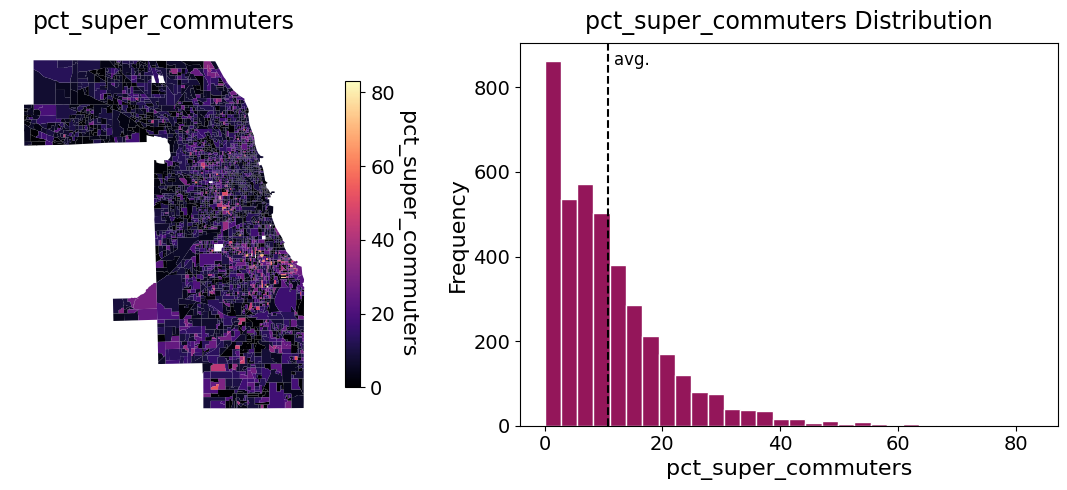

In [47]:
gdf_sct = acquire.get_censhp(
    variables={"B08303_012E":"commute_over_60min", "B08303_001E":"total_commuters"},  # 1-1.5hr
    geography="block group",
    county="Cook County",
    state="IL",
    dataset="acs5",
    year=2023
)
gdf_sct["pct_super_commuters"] = gdf_sct["commute_over_60min"] / gdf_sct["total_commuters"] * 100
acquire.quick_viz(gdf_sct, "pct_super_commuters")

### 2.5 place (city, census designated place)

#### 2.5.1 San Francisco

In [48]:
from pycen.geography.search import search
search('san francisco','CA')

{'state': {'name': 'California', 'abbr': 'CA', 'fips': '06'},
 'places': [{'fips': '67000',
   'name': 'San Francisco city',
   'state_fips': '06'}],
 'counties': [{'fips': '075', 'name': 'San Francisco', 'state_fips': '06'}]}

Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2023)
  Geography: Tract
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


Fetching boundaries...
Merging data...
Clipping to place: San Francisco city
Fetching boundaries...

Done!


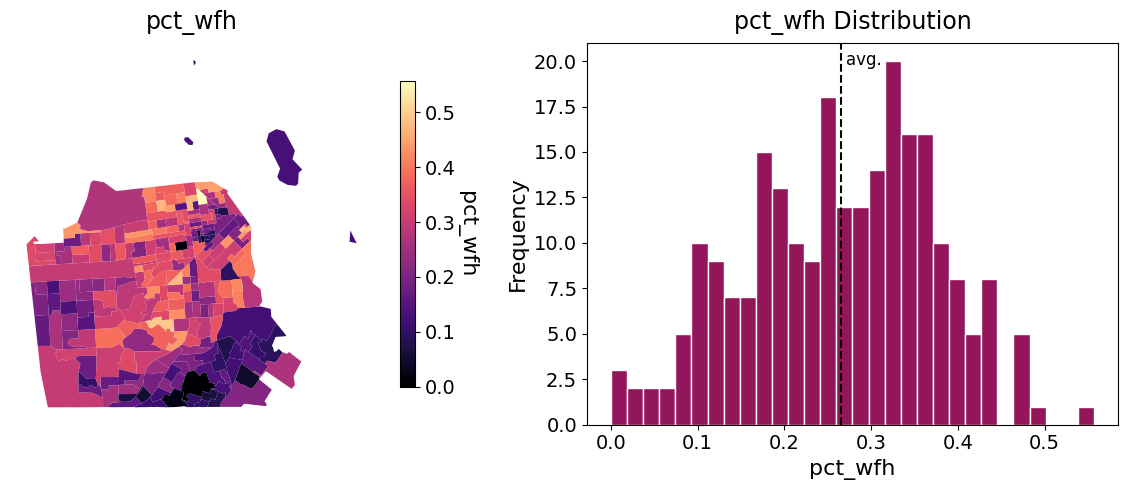

In [49]:
gdf_wfh_sf = acquire.get_censhp(
    variables=['B08101_049E', 'B08301_001E'], # total worked from home, total commute
    geography='tract',
    place = 'San Francisco city',
    state='CA',
    dataset="acs5",
    year=2023,
)
gdf_wfh_sf['pct_wfh'] = gdf_wfh_sf['B08101_049E'] / gdf_wfh_sf['B08301_001E']
acquire.quick_viz(gdf_wfh_sf, 'pct_wfh')

#### 2.5.2 Los Angeles

In [50]:
explore.lookup('B08101_001E',year=2023,dataset='acs5')


Variable: B08101_001E
Label: Estimate!!Total:
Concept: Means of Transportation to Work by Age
Type: int
Group: B08101
Year: 2023
Dataset: ACS5


Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2023)
  Geography: Block Group
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fetching boundaries...
Merging data...
Clipping to place: Los Angeles city
Fetching boundaries...

Done!


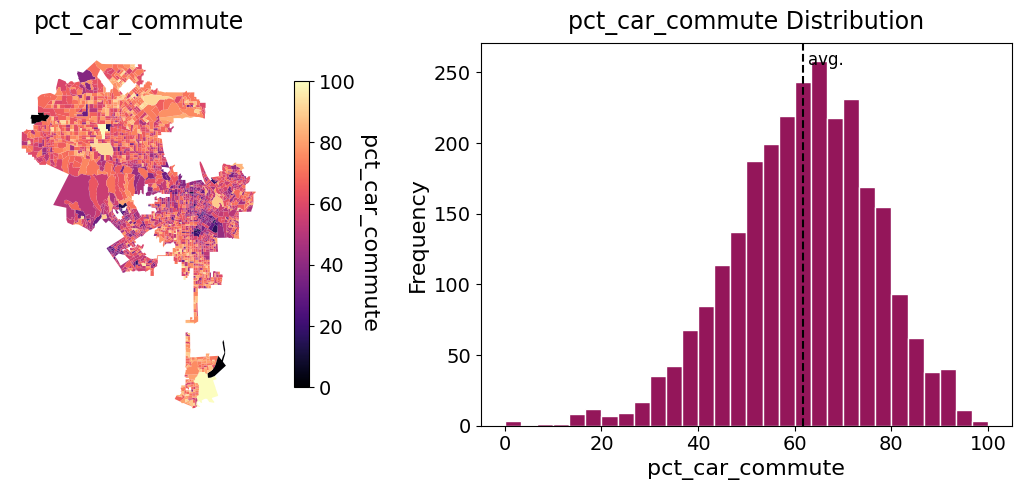

In [51]:
gdf_car = acquire.get_censhp(
    variables=['B08301_003E', 'B08301_001E'], # total drove alone to work, total commute
    geography='block group',
    place = 'Los Angeles city',
    state='CA',
    dataset="acs5",
    year=2023,
)
gdf_car['pct_car_commute'] = gdf_car['B08301_003E'] / gdf_car['B08301_001E'] * 100
acquire.quick_viz(gdf_car, 'pct_car_commute')

#### 2.5.3 Boston

In [52]:
search('Boston','MA')

{'state': {'name': 'Massachusetts', 'abbr': 'MA', 'fips': '25'},
 'places': [{'fips': '07000', 'name': 'Boston city', 'state_fips': '25'}],
 'counties': [{'fips': '025', 'name': 'Suffolk', 'state_fips': '25'}]}

In [53]:
explore.lookup('B11001_007E',year=2023,dataset='acs5')


Variable: B11001_007E
Label: Estimate!!Total:!!Nonfamily households:
Concept: Household Type (Including Living Alone)
Type: int
Group: B11001
Year: 2023
Dataset: ACS5


Resolving geography...
  State: Massachusetts (MA, FIPS: 25)

Fetching data...
  Product: acs5 (2023)
  Geography: Block Group
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


Fetching boundaries...
Merging data...
Clipping to place: Boston city
Fetching boundaries...

Done!


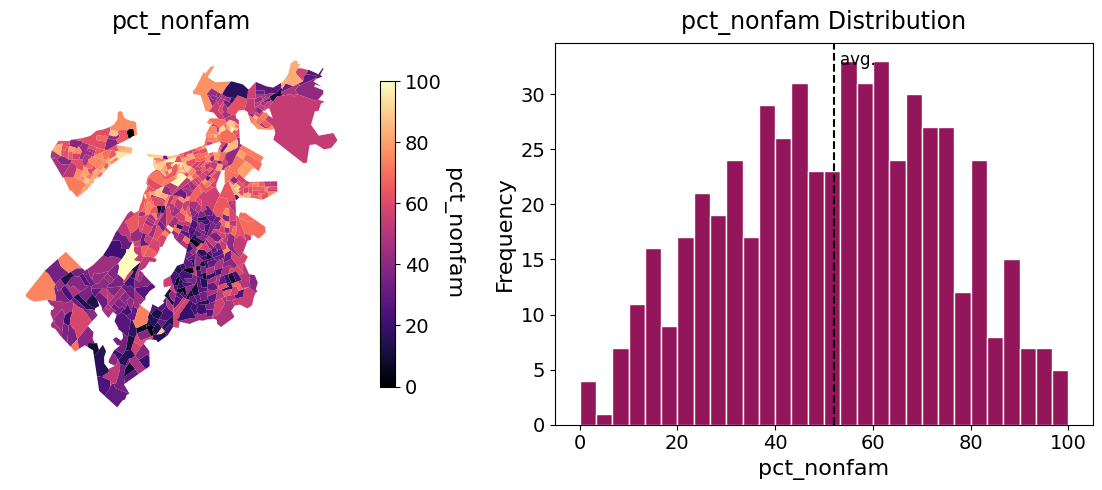

In [54]:
gdf_stu = acquire.get_censhp(
    variables=['B11001_007E', 'B11001_001E'], # non-family household, total household
    geography='block group',
    place = 'Boston city',
    state='MA',
    dataset="acs5",
    year=2023,
)
gdf_stu['pct_nonfam'] = gdf_stu['B11001_007E'] / gdf_stu['B11001_001E'] * 100
acquire.quick_viz(gdf_stu, 'pct_nonfam')

#### 2.5.4 Palo Alto

In [55]:
from pycen.geography.search import search
search('palo alto','CA')

{'state': {'name': 'California', 'abbr': 'CA', 'fips': '06'},
 'places': [{'fips': '55282', 'name': 'Palo Alto city', 'state_fips': '06'}],
 'counties': [{'fips': '085', 'name': 'Santa Clara', 'state_fips': '06'}]}

Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2023)
  Geography: Block Group
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fetching boundaries...
Merging data...
Clipping to place: Palo Alto city
Fetching boundaries...

Done!


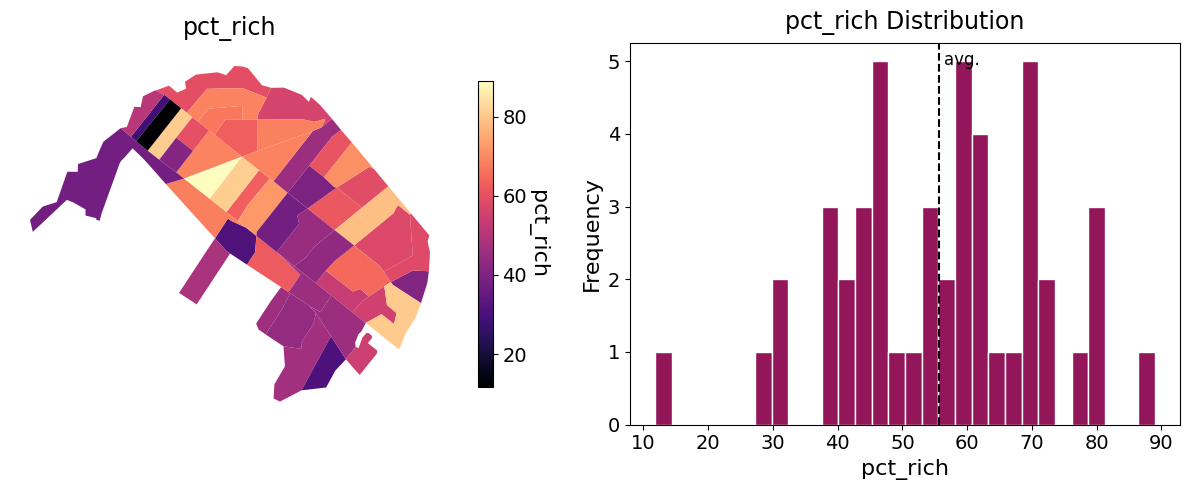

In [56]:
gdf_rich = acquire.get_censhp(
    variables=['B19001_017E','B19001_001E'],   # households earning $200k+ %
    geography='block group',
    place='Palo Alto city',
    state="CA",
    dataset="acs5",
    year=2023
)
gdf_rich["pct_rich"] = gdf_rich["B19001_017E"] / gdf_rich["B19001_001E"] * 100
acquire.quick_viz(gdf_rich, "pct_rich")

#### 2.5.5 Las Vegas

In [57]:
search('Las Vegas','NV')

{'state': {'name': 'Nevada', 'abbr': 'NV', 'fips': '32'},
 'places': [{'fips': '40000', 'name': 'Las Vegas city', 'state_fips': '32'}],
 'counties': [{'fips': '003', 'name': 'Clark', 'state_fips': '32'}]}

In [58]:
explore.lookup('B08302_004E',year=2023,dataset='acs5')


Variable: B08302_004E
Label: Estimate!!Total:!!5:30 a.m. to 5:59 a.m.
Concept: Time of Departure to Go to Work
Type: int
Group: B08302
Year: 2023
Dataset: ACS5


Resolving geography...
  State: Nevada (NV, FIPS: 32)

Fetching data...
  Product: acs5 (2023)
  Geography: Block Group
  Variables: 4


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


Fetching boundaries...
Merging data...
Clipping to place: Las Vegas city
Fetching boundaries...

Done!


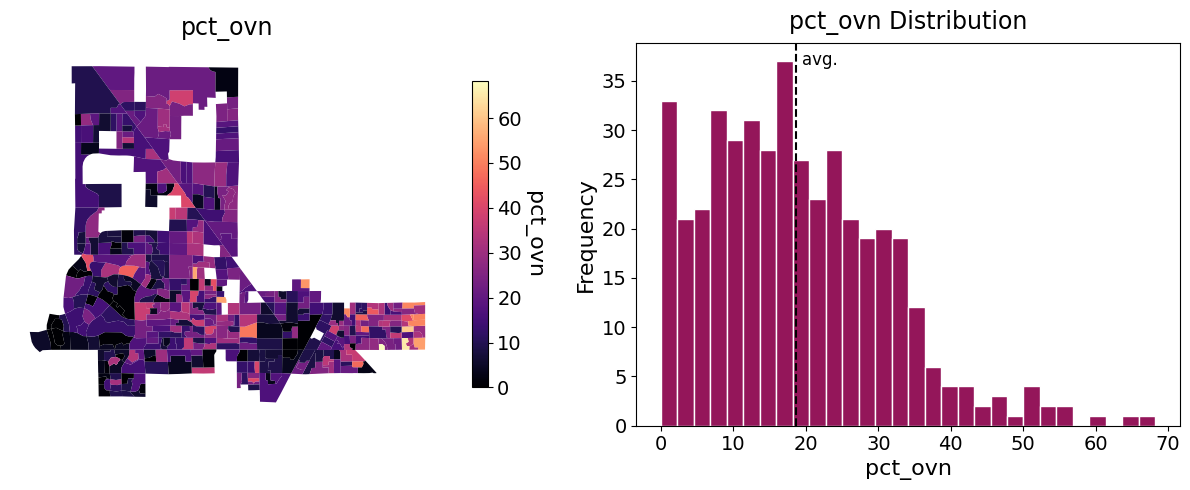

In [59]:
gdf_24hr = acquire.get_censhp(
    variables=['B08302_002E','B08302_003E', 'B08302_004E', 'B08302_001E'],   # overnight workers
    geography='block group',
    place='Las Vegas city',
    state='NV',
    dataset='acs5',
    year=2023
)
gdf_24hr['total_ovn'] = gdf_24hr['B08302_002E'] + gdf_24hr["B08302_003E"] + gdf_24hr['B08302_004E']
gdf_24hr['pct_ovn'] = gdf_24hr['total_ovn'] / gdf_24hr['B08302_001E'] * 100
acquire.quick_viz(gdf_24hr, 'pct_ovn')